### 2019.11.23. 딥-러닝 과정 Mulit Layer Perceptron(MLP)

## 세번째 실습. Keras 모델 생성/학습 - 당뇨병 예측 모델

In [1]:
# 1. Pandas 가져오기
import pandas as pd

print(pd.__version__)

0.23.0


/anaconda/envs/py35/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda/envs/py35/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
# 2. 데이터 불러오기
dataset = pd.read_csv('diabetes_data.csv')
dataset.head(10)

,pregnant,gloucose,blood pressure,skin thickness,insulin,BMI,DPF,age,result
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [3]:
# 3. X/y 나누기

X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

print(X.shape)
print(y.shape)

(768, 8)
(768,)


In [13]:
# 4. Train set, Test set 나누기

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3,
                                                    random_state=9)

X_val, X_test, y_val, y_test = train_test_split(X_test, y_test,
                                               test_size=0.5,
                                               random_state=123)

print(X_train.shape)
print(y_train.shape)

print(X_val.shape)
print(y_val.shape)

print(X_test.shape)
print(y_test.shape)


(537, 8)
(537,)
(115, 8)
(115,)
(116, 8)
(116,)


In [27]:
# 5. Keras 패키지 가져오기

from keras.models import Sequential
from keras.layers import Dense, Dropout
import keras

print(keras.__version__)

2.2.4


In [28]:
# 6. MLP 모델 생성

model = Sequential()
model.add(Dense(12, input_dim=8, 
                activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(8, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

print(model.summary())

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 12)                108       
_________________________________________________________________
dropout_1 (Dropout)          (None, 12)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 8)                 104       
_________________________________________________________________
dropout_2 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 9         
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________
None


In [29]:
# 7. Compile - Optimizer, Loss function 설정

model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])


In [30]:
# 8. 학습시키기

batch_size = 16
epochs = 1000

history = model.fit(X_train, y_train,
         epochs=epochs,
         batch_size=batch_size,
         validation_data=(X_val, y_val), 
         verbose=1,
         shuffle=True)

Train on 537 samples, validate on 115 samples
Epoch 1/1000
537/537 [==============================] - 1s 970us/step - loss: 4.9289 - acc: 0.5736 - val_loss: 3.2560 - val_acc: 0.6609
Epoch 2/1000
537/537 [==============================] - 0s 88us/step - loss: 3.4709 - acc: 0.6425 - val_loss: 3.2140 - val_acc: 0.6522
Epoch 3/1000
537/537 [==============================] - 0s 81us/step - loss: 3.7243 - acc: 0.5940 - val_loss: 3.0675 - val_acc: 0.6696
Epoch 4/1000
537/537 [==============================] - 0s 85us/step - loss: 3.1871 - acc: 0.5940 - val_loss: 3.0582 - val_acc: 0.6522
Epoch 5/1000
537/537 [==============================] - 0s 88us/step - loss: 2.8122 - acc: 0.6369 - val_loss: 2.8971 - val_acc: 0.6522
Epoch 6/1000
537/537 [==============================] - 0s 79us/step - loss: 2.5671 - acc: 0.6294 - val_loss: 2.6111 - val_acc: 0.6435
Epoch 7/1000
537/537 [==============================] - 0s 83us/step - loss: 2.3731 - acc: 0.5996 - val_loss: 2.0626 - val_acc: 0.6696
Epoch 8/

Epoch 61/1000
537/537 [==============================] - 0s 79us/step - loss: 0.6357 - acc: 0.6536 - val_loss: 0.6146 - val_acc: 0.6696
Epoch 62/1000
537/537 [==============================] - 0s 78us/step - loss: 0.6384 - acc: 0.6518 - val_loss: 0.6166 - val_acc: 0.6696
Epoch 63/1000
537/537 [==============================] - 0s 75us/step - loss: 0.6397 - acc: 0.6648 - val_loss: 0.6158 - val_acc: 0.6696
Epoch 64/1000
537/537 [==============================] - 0s 83us/step - loss: 0.6249 - acc: 0.6760 - val_loss: 0.6135 - val_acc: 0.6783
Epoch 65/1000
537/537 [==============================] - 0s 87us/step - loss: 0.6467 - acc: 0.6611 - val_loss: 0.6123 - val_acc: 0.6783
Epoch 66/1000
537/537 [==============================] - 0s 91us/step - loss: 0.6285 - acc: 0.6704 - val_loss: 0.6126 - val_acc: 0.6783
Epoch 67/1000
537/537 [==============================] - 0s 94us/step - loss: 0.6318 - acc: 0.6741 - val_loss: 0.6126 - val_acc: 0.6783
Epoch 68/1000
537/537 [=========================

537/537 [==============================] - 0s 90us/step - loss: 0.6052 - acc: 0.6834 - val_loss: 0.6014 - val_acc: 0.6783
Epoch 122/1000
537/537 [==============================] - 0s 77us/step - loss: 0.6294 - acc: 0.6741 - val_loss: 0.6007 - val_acc: 0.6957
Epoch 123/1000
537/537 [==============================] - 0s 79us/step - loss: 0.6087 - acc: 0.6890 - val_loss: 0.5998 - val_acc: 0.6870
Epoch 124/1000
537/537 [==============================] - 0s 83us/step - loss: 0.6225 - acc: 0.6685 - val_loss: 0.5998 - val_acc: 0.6783
Epoch 125/1000
537/537 [==============================] - 0s 90us/step - loss: 0.6143 - acc: 0.6816 - val_loss: 0.5948 - val_acc: 0.6783
Epoch 126/1000
537/537 [==============================] - 0s 78us/step - loss: 0.6093 - acc: 0.6778 - val_loss: 0.6010 - val_acc: 0.6870
Epoch 127/1000
537/537 [==============================] - 0s 85us/step - loss: 0.6179 - acc: 0.6723 - val_loss: 0.6005 - val_acc: 0.6783
Epoch 128/1000
537/537 [==============================] 

Epoch 181/1000
537/537 [==============================] - 0s 91us/step - loss: 0.6207 - acc: 0.6797 - val_loss: 0.5939 - val_acc: 0.6696
Epoch 182/1000
537/537 [==============================] - 0s 96us/step - loss: 0.6148 - acc: 0.6704 - val_loss: 0.5904 - val_acc: 0.6696
Epoch 183/1000
537/537 [==============================] - 0s 122us/step - loss: 0.6080 - acc: 0.6741 - val_loss: 0.5901 - val_acc: 0.6696
Epoch 184/1000
537/537 [==============================] - 0s 84us/step - loss: 0.6141 - acc: 0.6723 - val_loss: 0.5963 - val_acc: 0.6696
Epoch 185/1000
537/537 [==============================] - 0s 84us/step - loss: 0.5996 - acc: 0.6778 - val_loss: 0.5916 - val_acc: 0.6696
Epoch 186/1000
537/537 [==============================] - 0s 82us/step - loss: 0.6258 - acc: 0.6797 - val_loss: 0.5881 - val_acc: 0.6870
Epoch 187/1000
537/537 [==============================] - 0s 84us/step - loss: 0.6157 - acc: 0.6760 - val_loss: 0.5930 - val_acc: 0.6696
Epoch 188/1000
537/537 [================

Epoch 241/1000
537/537 [==============================] - 0s 81us/step - loss: 0.6097 - acc: 0.6667 - val_loss: 0.5899 - val_acc: 0.6696
Epoch 242/1000
537/537 [==============================] - 0s 76us/step - loss: 0.6160 - acc: 0.6797 - val_loss: 0.5884 - val_acc: 0.6957
Epoch 243/1000
537/537 [==============================] - 0s 76us/step - loss: 0.6097 - acc: 0.6667 - val_loss: 0.5945 - val_acc: 0.6783
Epoch 244/1000
537/537 [==============================] - 0s 78us/step - loss: 0.5967 - acc: 0.6834 - val_loss: 0.5863 - val_acc: 0.6870
Epoch 245/1000
537/537 [==============================] - 0s 83us/step - loss: 0.6044 - acc: 0.6778 - val_loss: 0.5772 - val_acc: 0.6696
Epoch 246/1000
537/537 [==============================] - 0s 84us/step - loss: 0.6040 - acc: 0.6685 - val_loss: 0.5790 - val_acc: 0.6870
Epoch 247/1000
537/537 [==============================] - 0s 81us/step - loss: 0.6123 - acc: 0.6778 - val_loss: 0.5810 - val_acc: 0.7043
Epoch 248/1000
537/537 [=================

Epoch 301/1000
537/537 [==============================] - 0s 132us/step - loss: 0.5979 - acc: 0.6890 - val_loss: 0.5752 - val_acc: 0.6870
Epoch 302/1000
537/537 [==============================] - 0s 97us/step - loss: 0.5818 - acc: 0.6834 - val_loss: 0.5674 - val_acc: 0.7130
Epoch 303/1000
537/537 [==============================] - 0s 78us/step - loss: 0.6195 - acc: 0.6611 - val_loss: 0.5743 - val_acc: 0.6870
Epoch 304/1000
537/537 [==============================] - 0s 84us/step - loss: 0.6012 - acc: 0.6723 - val_loss: 0.5758 - val_acc: 0.6957
Epoch 305/1000
537/537 [==============================] - 0s 95us/step - loss: 0.6087 - acc: 0.6816 - val_loss: 0.5767 - val_acc: 0.6870
Epoch 306/1000
537/537 [==============================] - 0s 90us/step - loss: 0.5928 - acc: 0.6890 - val_loss: 0.5724 - val_acc: 0.6870
Epoch 307/1000
537/537 [==============================] - 0s 83us/step - loss: 0.6008 - acc: 0.6834 - val_loss: 0.5748 - val_acc: 0.6957
Epoch 308/1000
537/537 [================

Epoch 361/1000
537/537 [==============================] - 0s 95us/step - loss: 0.5862 - acc: 0.7095 - val_loss: 0.5805 - val_acc: 0.7043
Epoch 362/1000
537/537 [==============================] - 0s 73us/step - loss: 0.5849 - acc: 0.6909 - val_loss: 0.5712 - val_acc: 0.7130
Epoch 363/1000
537/537 [==============================] - 0s 108us/step - loss: 0.5903 - acc: 0.6872 - val_loss: 0.5713 - val_acc: 0.7043
Epoch 364/1000
537/537 [==============================] - 0s 86us/step - loss: 0.5614 - acc: 0.7132 - val_loss: 0.5652 - val_acc: 0.7130
Epoch 365/1000
537/537 [==============================] - 0s 86us/step - loss: 0.6060 - acc: 0.6797 - val_loss: 0.5755 - val_acc: 0.6957
Epoch 366/1000
537/537 [==============================] - 0s 79us/step - loss: 0.5802 - acc: 0.6890 - val_loss: 0.5699 - val_acc: 0.6957
Epoch 367/1000
537/537 [==============================] - 0s 82us/step - loss: 0.5784 - acc: 0.7020 - val_loss: 0.5747 - val_acc: 0.7130
Epoch 368/1000
537/537 [================

Epoch 421/1000
537/537 [==============================] - 0s 82us/step - loss: 0.5764 - acc: 0.7076 - val_loss: 0.5629 - val_acc: 0.7304
Epoch 422/1000
537/537 [==============================] - 0s 83us/step - loss: 0.5805 - acc: 0.7039 - val_loss: 0.5593 - val_acc: 0.7130
Epoch 423/1000
537/537 [==============================] - 0s 81us/step - loss: 0.5909 - acc: 0.6909 - val_loss: 0.5605 - val_acc: 0.7478
Epoch 424/1000
537/537 [==============================] - 0s 82us/step - loss: 0.5733 - acc: 0.7151 - val_loss: 0.5630 - val_acc: 0.7217
Epoch 425/1000
537/537 [==============================] - 0s 80us/step - loss: 0.5772 - acc: 0.7002 - val_loss: 0.5657 - val_acc: 0.7217
Epoch 426/1000
537/537 [==============================] - 0s 84us/step - loss: 0.5941 - acc: 0.6946 - val_loss: 0.5600 - val_acc: 0.7304
Epoch 427/1000
537/537 [==============================] - 0s 80us/step - loss: 0.5584 - acc: 0.7132 - val_loss: 0.5603 - val_acc: 0.7478
Epoch 428/1000
537/537 [=================

Epoch 481/1000
537/537 [==============================] - 0s 86us/step - loss: 0.5864 - acc: 0.6946 - val_loss: 0.5604 - val_acc: 0.7217
Epoch 482/1000
537/537 [==============================] - 0s 78us/step - loss: 0.5697 - acc: 0.7039 - val_loss: 0.5633 - val_acc: 0.7304
Epoch 483/1000
537/537 [==============================] - 0s 78us/step - loss: 0.5699 - acc: 0.7095 - val_loss: 0.5627 - val_acc: 0.7391
Epoch 484/1000
537/537 [==============================] - 0s 78us/step - loss: 0.5697 - acc: 0.7039 - val_loss: 0.5657 - val_acc: 0.7304
Epoch 485/1000
537/537 [==============================] - 0s 89us/step - loss: 0.5563 - acc: 0.7300 - val_loss: 0.5620 - val_acc: 0.7217
Epoch 486/1000
537/537 [==============================] - 0s 77us/step - loss: 0.5630 - acc: 0.7114 - val_loss: 0.5548 - val_acc: 0.7217
Epoch 487/1000
537/537 [==============================] - 0s 77us/step - loss: 0.5547 - acc: 0.7225 - val_loss: 0.5569 - val_acc: 0.7391
Epoch 488/1000
537/537 [=================

Epoch 541/1000
537/537 [==============================] - 0s 81us/step - loss: 0.5650 - acc: 0.7132 - val_loss: 0.5616 - val_acc: 0.7217
Epoch 542/1000
537/537 [==============================] - 0s 80us/step - loss: 0.5568 - acc: 0.7169 - val_loss: 0.5600 - val_acc: 0.7217
Epoch 543/1000
537/537 [==============================] - 0s 83us/step - loss: 0.5895 - acc: 0.6965 - val_loss: 0.5656 - val_acc: 0.7130
Epoch 544/1000
537/537 [==============================] - 0s 80us/step - loss: 0.5768 - acc: 0.7058 - val_loss: 0.5704 - val_acc: 0.7217
Epoch 545/1000
537/537 [==============================] - 0s 80us/step - loss: 0.5625 - acc: 0.7058 - val_loss: 0.5674 - val_acc: 0.6957
Epoch 546/1000
537/537 [==============================] - 0s 85us/step - loss: 0.5642 - acc: 0.7300 - val_loss: 0.5641 - val_acc: 0.7391
Epoch 547/1000
537/537 [==============================] - 0s 83us/step - loss: 0.5606 - acc: 0.7244 - val_loss: 0.5696 - val_acc: 0.6957
Epoch 548/1000
537/537 [=================

Epoch 601/1000
537/537 [==============================] - 0s 97us/step - loss: 0.5528 - acc: 0.7188 - val_loss: 0.5635 - val_acc: 0.7304
Epoch 602/1000
537/537 [==============================] - 0s 89us/step - loss: 0.5625 - acc: 0.7169 - val_loss: 0.5649 - val_acc: 0.7304
Epoch 603/1000
537/537 [==============================] - 0s 89us/step - loss: 0.5703 - acc: 0.7095 - val_loss: 0.5705 - val_acc: 0.7130
Epoch 604/1000
537/537 [==============================] - 0s 84us/step - loss: 0.5653 - acc: 0.7114 - val_loss: 0.5696 - val_acc: 0.7043
Epoch 605/1000
537/537 [==============================] - 0s 90us/step - loss: 0.5697 - acc: 0.7132 - val_loss: 0.5594 - val_acc: 0.7391
Epoch 606/1000
537/537 [==============================] - 0s 82us/step - loss: 0.5792 - acc: 0.7076 - val_loss: 0.5656 - val_acc: 0.7391
Epoch 607/1000
537/537 [==============================] - 0s 80us/step - loss: 0.5781 - acc: 0.7039 - val_loss: 0.5644 - val_acc: 0.7304
Epoch 608/1000
537/537 [=================

Epoch 661/1000
537/537 [==============================] - 0s 78us/step - loss: 0.5577 - acc: 0.7188 - val_loss: 0.5774 - val_acc: 0.7304
Epoch 662/1000
537/537 [==============================] - 0s 75us/step - loss: 0.5530 - acc: 0.7393 - val_loss: 0.5722 - val_acc: 0.7391
Epoch 663/1000
537/537 [==============================] - 0s 78us/step - loss: 0.5666 - acc: 0.7132 - val_loss: 0.5738 - val_acc: 0.7304
Epoch 664/1000
537/537 [==============================] - 0s 79us/step - loss: 0.5801 - acc: 0.7095 - val_loss: 0.5881 - val_acc: 0.7130
Epoch 665/1000
537/537 [==============================] - 0s 79us/step - loss: 0.5738 - acc: 0.7058 - val_loss: 0.5801 - val_acc: 0.7043
Epoch 666/1000
537/537 [==============================] - 0s 75us/step - loss: 0.5735 - acc: 0.7132 - val_loss: 0.5694 - val_acc: 0.7130
Epoch 667/1000
537/537 [==============================] - 0s 80us/step - loss: 0.5449 - acc: 0.7412 - val_loss: 0.5483 - val_acc: 0.7391
Epoch 668/1000
537/537 [=================

Epoch 721/1000
537/537 [==============================] - 0s 72us/step - loss: 0.5578 - acc: 0.7188 - val_loss: 0.5508 - val_acc: 0.7217
Epoch 722/1000
537/537 [==============================] - 0s 77us/step - loss: 0.5493 - acc: 0.7356 - val_loss: 0.5533 - val_acc: 0.7304
Epoch 723/1000
537/537 [==============================] - 0s 77us/step - loss: 0.5583 - acc: 0.7207 - val_loss: 0.5512 - val_acc: 0.7217
Epoch 724/1000
537/537 [==============================] - 0s 76us/step - loss: 0.5630 - acc: 0.7058 - val_loss: 0.5544 - val_acc: 0.6957
Epoch 725/1000
537/537 [==============================] - 0s 76us/step - loss: 0.5686 - acc: 0.7002 - val_loss: 0.5593 - val_acc: 0.7130
Epoch 726/1000
537/537 [==============================] - 0s 82us/step - loss: 0.5542 - acc: 0.7263 - val_loss: 0.5510 - val_acc: 0.7391
Epoch 727/1000
537/537 [==============================] - 0s 76us/step - loss: 0.5463 - acc: 0.7337 - val_loss: 0.5534 - val_acc: 0.7130
Epoch 728/1000
537/537 [=================

Epoch 781/1000
537/537 [==============================] - 0s 99us/step - loss: 0.5540 - acc: 0.7281 - val_loss: 0.5529 - val_acc: 0.7391
Epoch 782/1000
537/537 [==============================] - 0s 80us/step - loss: 0.5560 - acc: 0.7076 - val_loss: 0.5435 - val_acc: 0.7391
Epoch 783/1000
537/537 [==============================] - 0s 81us/step - loss: 0.5698 - acc: 0.7300 - val_loss: 0.5399 - val_acc: 0.7217
Epoch 784/1000
537/537 [==============================] - 0s 83us/step - loss: 0.5677 - acc: 0.7058 - val_loss: 0.5449 - val_acc: 0.7130
Epoch 785/1000
537/537 [==============================] - 0s 76us/step - loss: 0.5634 - acc: 0.7486 - val_loss: 0.5467 - val_acc: 0.7391
Epoch 786/1000
537/537 [==============================] - 0s 81us/step - loss: 0.5805 - acc: 0.7076 - val_loss: 0.5436 - val_acc: 0.7304
Epoch 787/1000
537/537 [==============================] - 0s 121us/step - loss: 0.5531 - acc: 0.7374 - val_loss: 0.5415 - val_acc: 0.7304
Epoch 788/1000
537/537 [================

Epoch 841/1000
537/537 [==============================] - 0s 76us/step - loss: 0.5710 - acc: 0.7188 - val_loss: 0.5731 - val_acc: 0.7304
Epoch 842/1000
537/537 [==============================] - 0s 79us/step - loss: 0.5743 - acc: 0.7076 - val_loss: 0.5793 - val_acc: 0.6957
Epoch 843/1000
537/537 [==============================] - 0s 80us/step - loss: 0.5622 - acc: 0.7300 - val_loss: 0.5760 - val_acc: 0.7304
Epoch 844/1000
537/537 [==============================] - 0s 79us/step - loss: 0.5656 - acc: 0.7263 - val_loss: 0.5790 - val_acc: 0.7217
Epoch 845/1000
537/537 [==============================] - 0s 77us/step - loss: 0.5842 - acc: 0.6965 - val_loss: 0.5752 - val_acc: 0.7304
Epoch 846/1000
537/537 [==============================] - 0s 76us/step - loss: 0.5638 - acc: 0.7076 - val_loss: 0.5748 - val_acc: 0.7130
Epoch 847/1000
537/537 [==============================] - 0s 76us/step - loss: 0.5723 - acc: 0.7300 - val_loss: 0.5769 - val_acc: 0.7217
Epoch 848/1000
537/537 [=================

Epoch 901/1000
537/537 [==============================] - 0s 76us/step - loss: 0.5665 - acc: 0.7244 - val_loss: 0.5907 - val_acc: 0.7217
Epoch 902/1000
537/537 [==============================] - 0s 78us/step - loss: 0.5649 - acc: 0.7132 - val_loss: 0.5933 - val_acc: 0.7130
Epoch 903/1000
537/537 [==============================] - 0s 78us/step - loss: 0.5587 - acc: 0.7225 - val_loss: 0.5922 - val_acc: 0.7478
Epoch 904/1000
537/537 [==============================] - 0s 80us/step - loss: 0.5827 - acc: 0.6946 - val_loss: 0.5891 - val_acc: 0.7217
Epoch 905/1000
537/537 [==============================] - 0s 88us/step - loss: 0.5548 - acc: 0.7151 - val_loss: 0.5915 - val_acc: 0.7304
Epoch 906/1000
537/537 [==============================] - 0s 80us/step - loss: 0.5459 - acc: 0.7132 - val_loss: 0.5901 - val_acc: 0.7478
Epoch 907/1000
537/537 [==============================] - 0s 88us/step - loss: 0.5532 - acc: 0.7225 - val_loss: 0.5845 - val_acc: 0.7391
Epoch 908/1000
537/537 [=================

Epoch 961/1000
537/537 [==============================] - 0s 86us/step - loss: 0.5430 - acc: 0.7207 - val_loss: 0.5821 - val_acc: 0.7217
Epoch 962/1000
537/537 [==============================] - 0s 76us/step - loss: 0.5680 - acc: 0.7169 - val_loss: 0.5831 - val_acc: 0.7304
Epoch 963/1000
537/537 [==============================] - 0s 75us/step - loss: 0.5583 - acc: 0.7188 - val_loss: 0.5850 - val_acc: 0.7304
Epoch 964/1000
537/537 [==============================] - 0s 75us/step - loss: 0.5414 - acc: 0.7412 - val_loss: 0.5850 - val_acc: 0.7217
Epoch 965/1000
537/537 [==============================] - 0s 85us/step - loss: 0.5629 - acc: 0.7281 - val_loss: 0.5789 - val_acc: 0.7391
Epoch 966/1000
537/537 [==============================] - 0s 80us/step - loss: 0.5625 - acc: 0.7263 - val_loss: 0.5751 - val_acc: 0.7391
Epoch 967/1000
537/537 [==============================] - 0s 78us/step - loss: 0.5325 - acc: 0.7430 - val_loss: 0.5743 - val_acc: 0.7391
Epoch 968/1000
537/537 [=================

In [31]:
# 9. 모델 평가하기
train_accuracy = model.evaluate(X_train, y_train)
test_accuracy = model.evaluate(X_test, y_test)

print("Train Acc:", train_accuracy)
print("Test Acc:", test_accuracy)

116/116 [==============================] - 0s 27us/step
Train Acc: [0.5100221896970738, 0.7541899434681045]
Test Acc: [0.725729592915239, 0.6724137972141134]


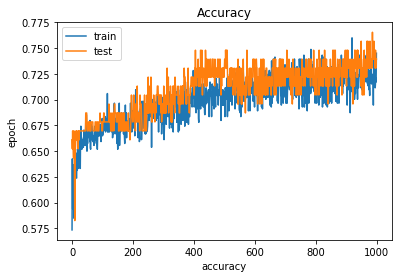

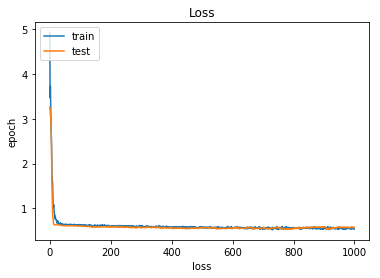

In [32]:
# 10. 학습 시각화하기

import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Accuracy')
plt.ylabel('epoch')
plt.xlabel('accuracy')
plt.legend(['train','test'], loc='upper left')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('epoch')
plt.xlabel('loss')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [ ]:
## 저장하기/불러오기
model.save('my_model.h5') 

from keras.models import load_model
model = load_model('my_model.h5')